# Import Libraries

In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [40]:
InsPerEnrDF = pd.read_csv('COVID_InsPerEnr.csv', index_col = 0)
InsPerEnrDF.head()

,State,cases,deaths,Medicare Health Insurance Per Enrollee (2014),Medicaid Health Insurance Per Enrollee (2014),Private Health Insurance Per Enrollee (2014)
0,Alabama,26912,785,7180.0,4262.0,3641.0
1,Alaska,751,10,7041.0,9927.0,5958.0
2,Arizona,39298,1228,6547.0,4223.0,4035.0
3,Arkansas,13191,188,6486.0,4342.0,3906.0
4,California,159098,5202,7669.0,3766.0,4735.0


In [41]:
InsPerEnrDF.shape

(55, 6)

In [42]:
InsPerEnrDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   State                                          55 non-null     object 
 1   cases                                          55 non-null     int64  
 2   deaths                                         55 non-null     int64  
 3   Medicare Health Insurance Per Enrollee (2014)  51 non-null     float64
 4   Medicaid Health Insurance Per Enrollee (2014)  51 non-null     float64
 5   Private Health Insurance Per Enrollee (2014)   51 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 3.0+ KB


In [43]:
InsPerEnrDF.isnull().sum()

State                                            0
cases                                            0
deaths                                           0
Medicare Health Insurance Per Enrollee (2014)    4
Medicaid Health Insurance Per Enrollee (2014)    4
Private Health Insurance Per Enrollee (2014)     4
dtype: int64

In [44]:
InsPerEnrDF = InsPerEnrDF.dropna()
InsPerEnrDF.isnull().sum()

State                                            0
cases                                            0
deaths                                           0
Medicare Health Insurance Per Enrollee (2014)    0
Medicaid Health Insurance Per Enrollee (2014)    0
Private Health Insurance Per Enrollee (2014)     0
dtype: int64

In [45]:
InsPerEnrDF.count()

State                                            51
cases                                            51
deaths                                           51
Medicare Health Insurance Per Enrollee (2014)    51
Medicaid Health Insurance Per Enrollee (2014)    51
Private Health Insurance Per Enrollee (2014)     51
dtype: int64

In [46]:
InsPerEnrDF.describe()

,cases,deaths,Medicare Health Insurance Per Enrollee (2014),Medicaid Health Insurance Per Enrollee (2014),Private Health Insurance Per Enrollee (2014)
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,41994.235294,2290.549020,6897.274510,6669.980392,4544.529412
std,63513.183767,4748.588326,924.127352,1955.324776,802.896391
min,614.000000,10.000000,5546.000000,3766.000000,3417.000000
25%,9231.500000,212.000000,6135.000000,5213.000000,4077.000000
50%,20152.000000,704.000000,6845.000000,6192.000000,4410.000000
75%,46961.500000,2469.500000,7520.500000,7482.500000,4830.500000
max,389349.000000,30683.000000,8946.000000,13093.000000,8831.000000


## Pearson Correlation

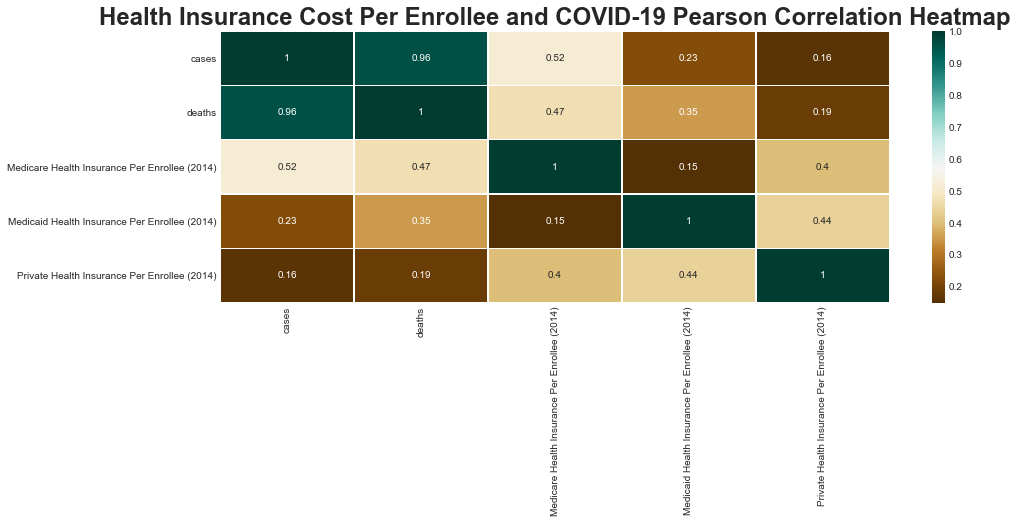

In [47]:
Pcorr = InsPerEnrDF.corr(method = 'pearson')
Pcorr

plt.figure(figsize = (15,5))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Cost Per Enrollee and COVID-19 Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Kendall Correlation

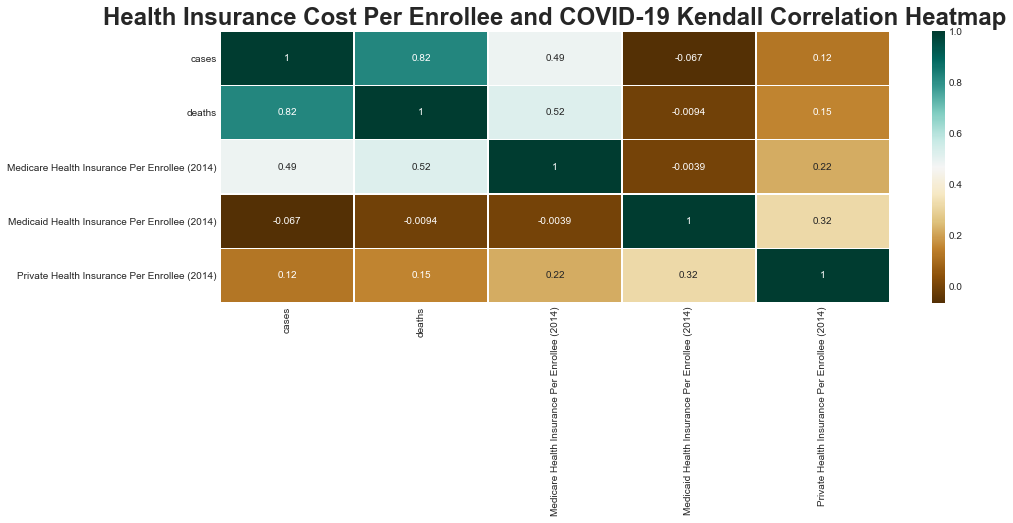

In [48]:
Kcorr = InsPerEnrDF.corr(method = 'kendall')
Kcorr

plt.figure(figsize = (15,5))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Cost Per Enrollee and COVID-19 Kendall Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Spearman Correlation

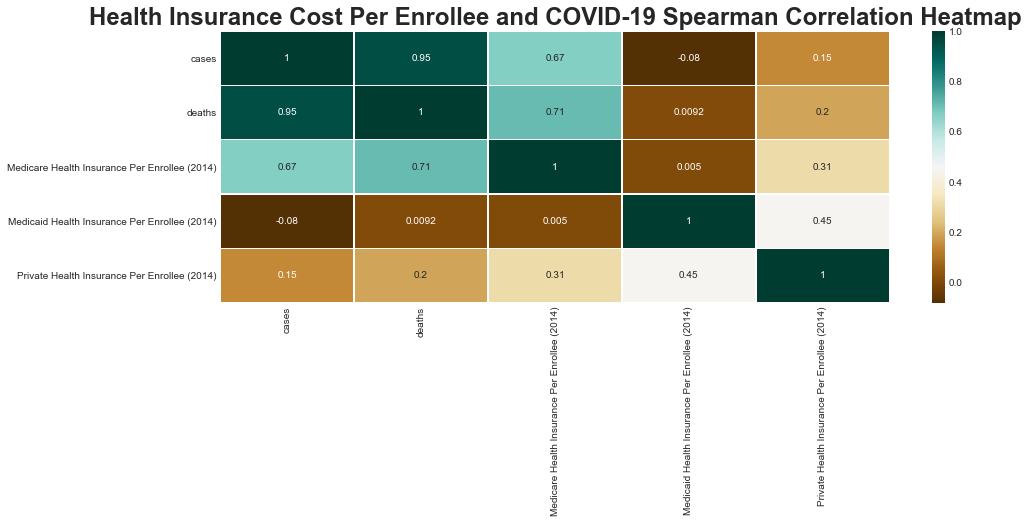

In [49]:
Scorr = InsPerEnrDF.corr(method = 'spearman')
Scorr

plt.figure(figsize = (15,5))
sns.heatmap(Scorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Cost Per Enrollee and COVID-19 Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 24);

In [50]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['Health Insurance'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases)
AllCorr['Kendall Correlation'] = list(Kcorr.cases)
AllCorr['Spearman Correlation'] = list(Scorr.cases)

AllCorr = AllCorr.drop([0, 1])
AllCorr = AllCorr.reset_index(drop = True)

AllCorr

,Health Insurance,Pearson Correlation,Kendall Correlation,Spearman Correlation
0,Medicare Health Insurance Per Enrollee (2014),0.516883,0.485490,0.667149
1,Medicaid Health Insurance Per Enrollee (2014),0.225673,-0.066667,-0.080090
2,Private Health Insurance Per Enrollee (2014),0.160924,0.121569,0.148507


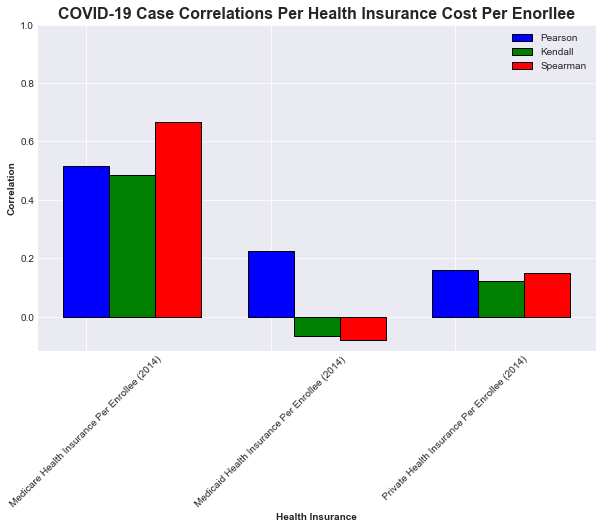

In [51]:
fig = plt.figure(figsize = (10,6))

X = list(AllCorr['Health Insurance'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Health Insurance Cost Per Enorllee', fontsize = 16, fontweight = 'bold')

plt.xlabel('Health Insurance', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

## Medicare Health Insurance Per Enrollee (2014)

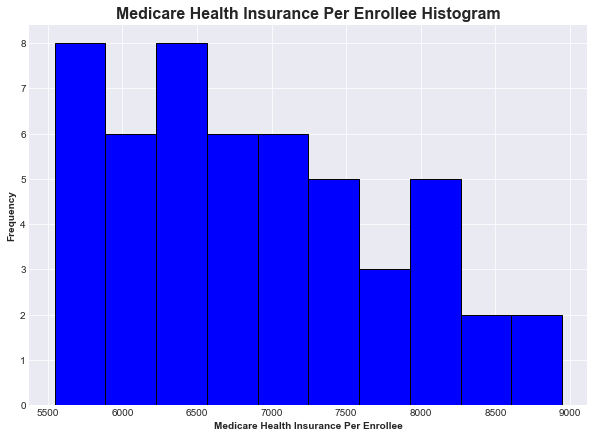

In [52]:
InsPerEnrDF['Medicare Health Insurance Per Enrollee (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Medicare Health Insurance Per Enrollee Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicare Health Insurance Per Enrollee', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

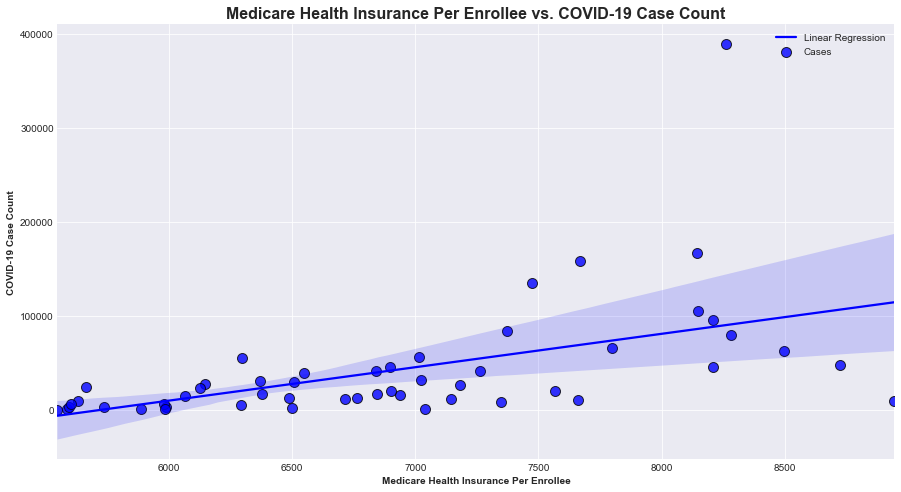

In [53]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Medicare Health Insurance Per Enrollee (2014)', y = 'cases', data = InsPerEnrDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Medicare Health Insurance Per Enrollee vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicare Health Insurance Per Enrollee', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [54]:
model1 = sm.OLS(InsPerEnrDF['cases'], InsPerEnrDF['Medicare Health Insurance Per Enrollee (2014)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.369
Model:                            OLS   Adj. R-squared (uncentered):              0.356
Method:                 Least Squares   F-statistic:                              29.18
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                    1.83e-06
Time:                        16:21:24   Log-Likelihood:                         -633.55
No. Observations:                  51   AIC:                                      1269.
Df Residuals:                      50   BIC:                                      1271.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Medicare Health Insurance Per Enrollee (2014)     6.5976      1.221      5.402      0.000       4.144       9.051
==============================================================================
Omnibus:                       72.854   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              776.574
Skew:                           3.812   Prob(JB):                    2.34e-169
Kurtosis:                      20.531   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

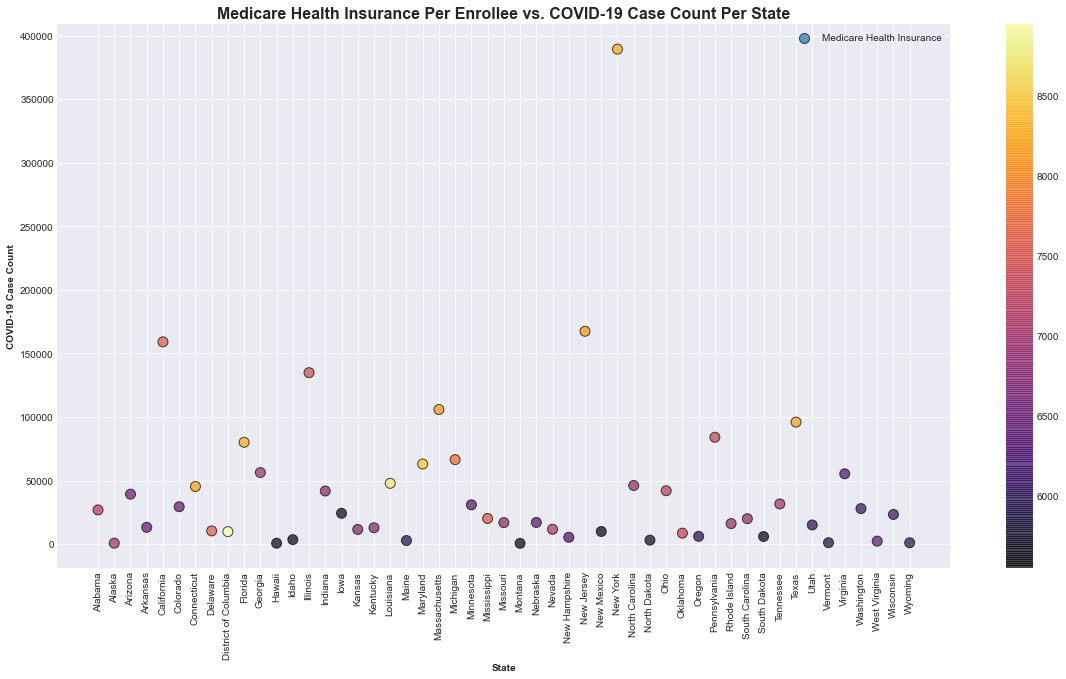

In [55]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = InsPerEnrDF['State'] 
y = InsPerEnrDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = InsPerEnrDF['Medicare Health Insurance Per Enrollee (2014)'], cmap = 'inferno')
plt.title('Medicare Health Insurance Per Enrollee vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Medicare Health Insurance'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Medicaid Health Insurance Per Enrollee (2014

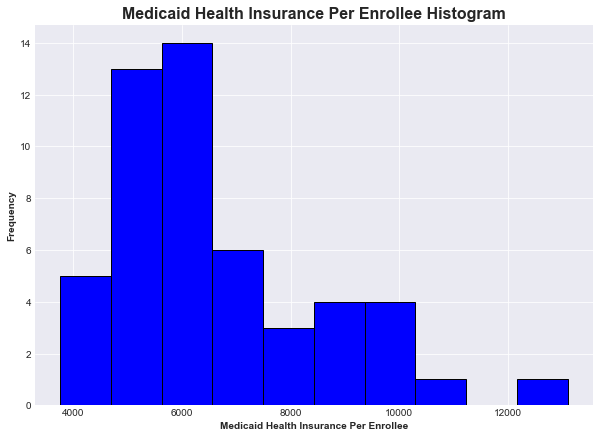

In [56]:
InsPerEnrDF['Medicaid Health Insurance Per Enrollee (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Medicaid Health Insurance Per Enrollee Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicaid Health Insurance Per Enrollee', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

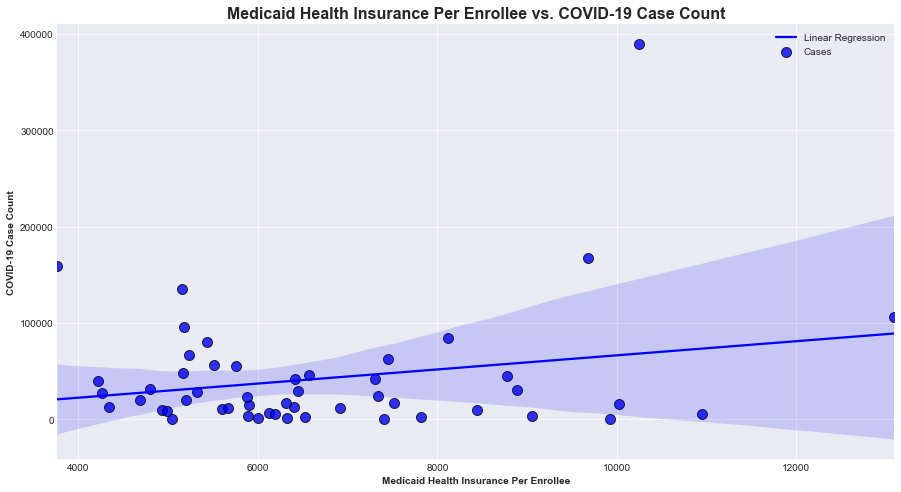

In [57]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Medicaid Health Insurance Per Enrollee (2014)', y = 'cases', 
            data = InsPerEnrDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Medicaid Health Insurance Per Enrollee vs. COVID-19 Case Count', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicaid Health Insurance Per Enrollee', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [58]:
model2 = sm.OLS(InsPerEnrDF['cases'], InsPerEnrDF['Medicaid Health Insurance Per Enrollee (2014)']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.343
Model:                            OLS   Adj. R-squared (uncentered):              0.330
Method:                 Least Squares   F-statistic:                              26.10
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                    5.10e-06
Time:                        16:21:30   Log-Likelihood:                         -634.56
No. Observations:                  51   AIC:                                      1271.
Df Residuals:                      50   BIC:                                      1273.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Medicaid Health Insurance Per Enrollee (2014)     6.3764      1.248      5.109      0.000       3.869       8.883
==============================================================================
Omnibus:                       62.607   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.928
Skew:                           3.226   Prob(JB):                    4.05e-102
Kurtosis:                      16.346   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

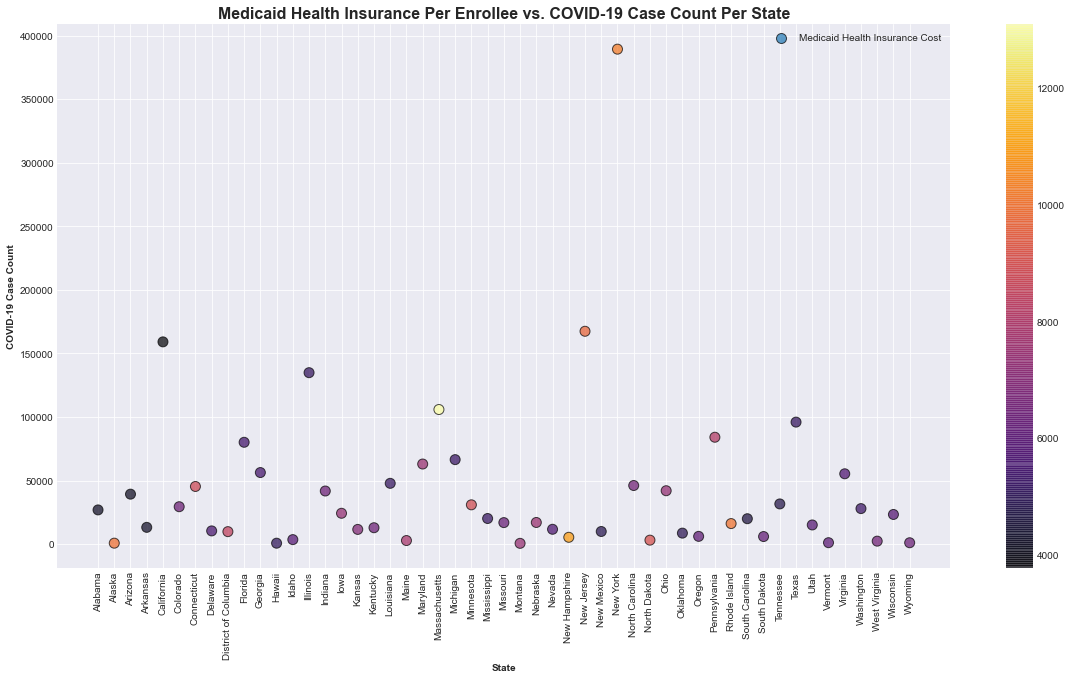

In [59]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = InsPerEnrDF['State'] 
y = InsPerEnrDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100,
            c = InsPerEnrDF['Medicaid Health Insurance Per Enrollee (2014)'], cmap = 'inferno')
plt.title('Medicaid Health Insurance Per Enrollee vs. COVID-19 Case Count Per State',
          fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Medicaid Health Insurance Cost'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Private Health Insurance Per Enrollee (2014)

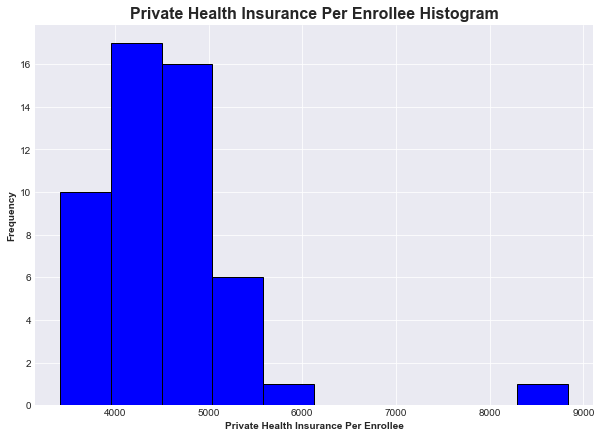

In [60]:
InsPerEnrDF['Private Health Insurance Per Enrollee (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Private Health Insurance Per Enrollee Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Private Health Insurance Per Enrollee', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

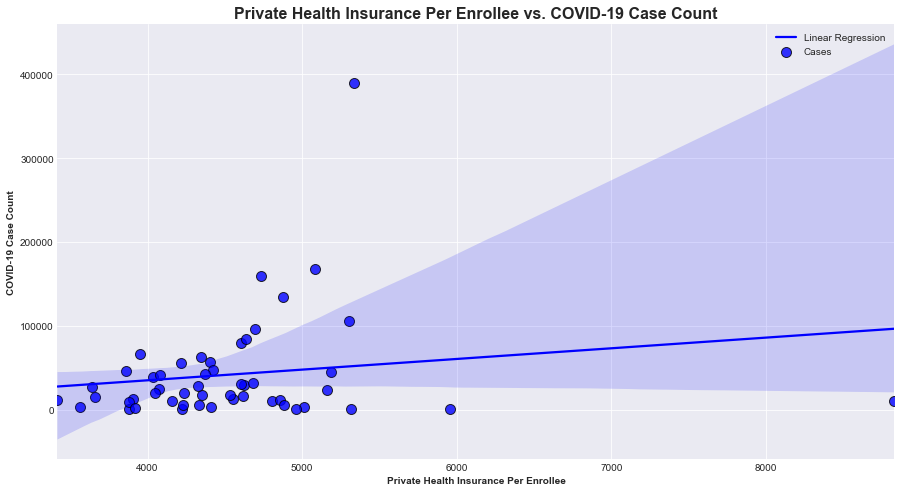

In [61]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Private Health Insurance Per Enrollee (2014)', y = 'cases',
            data = InsPerEnrDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Private Health Insurance Per Enrollee vs. COVID-19 Case Count',
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Private Health Insurance Per Enrollee', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [62]:
model3 = sm.OLS(InsPerEnrDF['cases'], InsPerEnrDF['Private Health Insurance Per Enrollee (2014)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.325
Model:                            OLS   Adj. R-squared (uncentered):              0.312
Method:                 Least Squares   F-statistic:                              24.07
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                    1.03e-05
Time:                        16:21:36   Log-Likelihood:                         -635.25
No. Observations:                  51   AIC:                                      1273.
Df Residuals:                      50   BIC:                                      1274.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Private Health Insurance Per Enrollee (2014)     9.3442      1.904      4.907      0.000       5.519      13.169
==============================================================================
Omnibus:                       67.161   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.039
Skew:                           3.464   Prob(JB):                    8.32e-131
Kurtosis:                      18.294   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

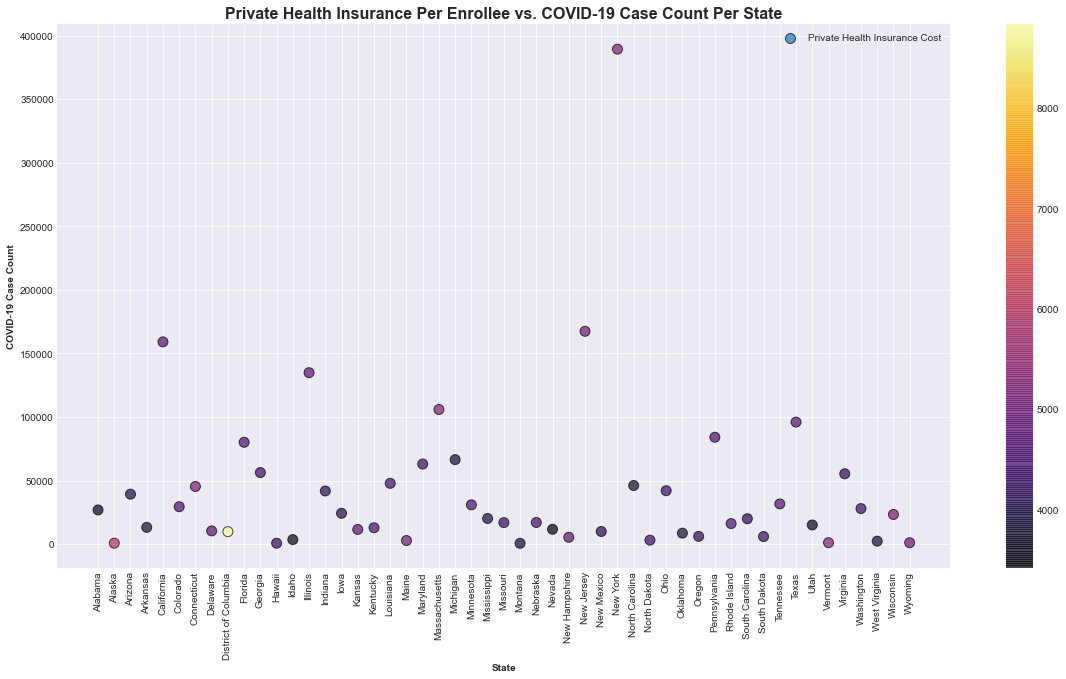

In [63]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = InsPerEnrDF['State'] 
y = InsPerEnrDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = InsPerEnrDF['Private Health Insurance Per Enrollee (2014)'], cmap = 'inferno')
plt.title('Private Health Insurance Per Enrollee vs. COVID-19 Case Count Per State', fontsize = 16,
          fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Private Health Insurance Cost'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Overall Health Insurance Costs Per Enrollee

In [65]:
model4 = sm.OLS(InsPerEnrDF['cases'], 
                InsPerEnrDF[['Medicare Health Insurance Per Enrollee (2014)', 
                             'Medicaid Health Insurance Per Enrollee (2014)',
                             'Private Health Insurance Per Enrollee (2014)']]).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.408
Model:                            OLS   Adj. R-squared (uncentered):              0.371
Method:                 Least Squares   F-statistic:                              11.03
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                    1.26e-05
Time:                        16:21:59   Log-Likelihood:                         -631.90
No. Observations:                  51   AIC:                                      1270.
Df Residuals:                      48   BIC:                                      1276.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Medicare Health Insurance Per Enrollee (2014)    16.4632      7.172      2.295      0.026       2.042      30.884
Medicaid Health Insurance Per Enrollee (2014)     4.6792      4.780      0.979      0.332      -4.931      14.289
Private Health Insurance Per Enrollee (2014)    -21.9392     12.271     -1.788      0.080     -46.612       2.733
==============================================================================
Omnibus:                       71.962   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              744.104
Skew:                           3.758   Prob(JB):                    2.63e-162
Kurtosis:                      20.137   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""